In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from acquire import get_titanic_data

from pydataset import data
from prepare import tvt

# Exercises

## Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

In [2]:
# Acquire dataframe 
df = get_titanic_data()

In [3]:
# calling already defined functions
def dropped(titanic,columns={'sepal_length', 'petal_width'}):
    '''
    dropped will take the dataframe and remove any columns that are indicated,
    hopefully making the process faster
    '''
    titanic = titanic.drop(columns=columns)
    return titanic

def prep_titanic(titanic):
    '''
    prep_titanic will do all the cleaning we need of the database 'titanic_db'.
    It will:
    - drop unnecessary columns ('deck', 'embark_town', 'pclass')
    - fill in null values from columns (embarked' and 'age')
    - create dummy variables for the categorical columns 'sex', 'embarked', and 'class'
    - concatenate the previous dataframe to the new ones with dummy variables
    
    return: concatenated and cleaned dataframe 'titanic_db' as 'df'
    '''
    titanic = dropped(titanic,columns={'deck', 'embark_town', 'pclass', 'passenger_id'})
    round(titanic['age'].mean())
    top_embarked = titanic['embarked'].describe()['top']
    titanic['embarked'] = titanic['embarked'].fillna(value='S')
    titanic['age'] = titanic['age'].fillna(value='30').astype(int)
    titanic['sex_encoded'] = titanic['sex'].map({'male': 1, 'female': 0})
    titanic['embarked_encoded'] = titanic['embarked'].map({'S': 1, 'C': 0, 'Q':2})
    titanic['class_encoded'] = titanic['class'].map({'Second': 1, 'First': 0, 'Third':2})
    titanic = dropped(titanic,columns={'sex', 'embarked', 'class'})
    return titanic

def print_and_label(df):
    '''
    print_and_label will take a confusion matrix and by indexing, will store and calculate certain criteria for you.
    return: accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
    '''
    TP = neo['0_actual']['0_predicted']
    FP = neo['1_actual']['0_predicted']
    FN = neo['0_actual']['1_predicted']
    TN = neo['1_actual']['1_predicted']
    neo_accuracy = (TP+TN)/(TP+FP+TN+FN)
    neo_precision = (TP)/(TP+FP)
    neo_recall = (TP)/(TP+FN)
    TPR = (TP)/(TP+FP)
    FPR = (FP)/(FP+TN)
    TNR = (TN)/(FP+TN)
    FNR = (FN)/(FN+TP)
    neo_support_0 = TP + FN
    neo_support_1 = FP + TN
    neo_f1 =  2 * ((neo_precision * neo_recall) / (neo_precision + neo_recall))
    return print(f'Accuracy: \n{neo_accuracy:2%}\n\nTrue Positive Rate: \n{TPR:2%}\
    \n\nFalse Positive Rate: \n{FPR:2%}\n\nTrue Negative Rate: \n{TNR:2%}\
    \n\nFalse Negative Rate: \n{FNR:2%}\n\nPrecision: \n{neo_precision:2%}\
    \n\nRecall: \n{neo_recall:2%}\n\nF1 Score: \n{neo_f1:2%}\
    \n\nSupport for Did Not Survive: \n{neo_support_0}\n\nSupport for Did Survive: \n{neo_support_1}')

In [4]:
titanic = prep_titanic(df)

In [5]:
titanic.head()

,survived,age,sibsp,parch,fare,alone,sex_encoded,embarked_encoded,class_encoded
0,0,22,1,0,7.2500,0,1,1,2
1,1,38,1,0,71.2833,0,0,0,0
2,1,26,0,0,7.9250,1,0,1,2
3,1,35,1,0,53.1000,0,0,1,0
4,0,35,0,0,8.0500,1,1,1,2


### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
# establishing baseline
baseline_accuracy = (titanic['survived'].value_counts().idxmax() == titanic.survived).mean()
baseline_accuracy

0.6161616161616161

In [7]:
train, validate, test = tvt(titanic, ['survived'])

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [8]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_encoded,embarked_encoded,class_encoded
72,21,0,0,73.5000,1,1,1,1
682,20,0,0,9.2250,1,1,1,2
399,28,0,0,12.6500,1,0,1,1
756,28,0,0,7.7958,1,1,1,2
394,24,0,2,16.7000,0,0,1,2


<Axes: xlabel='sex_encoded', ylabel='age'>

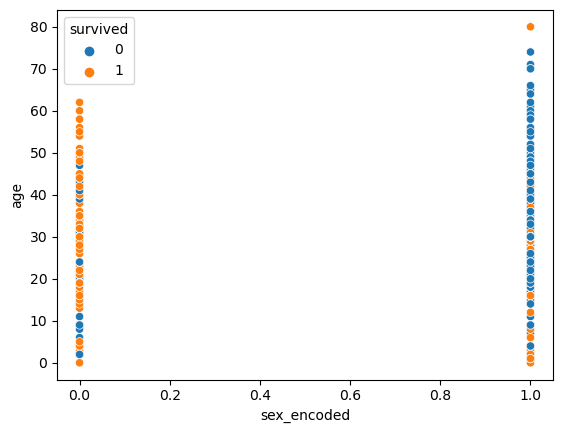

In [9]:
sns.scatterplot(data=X_train, x='sex_encoded', y='age', hue=y_train)

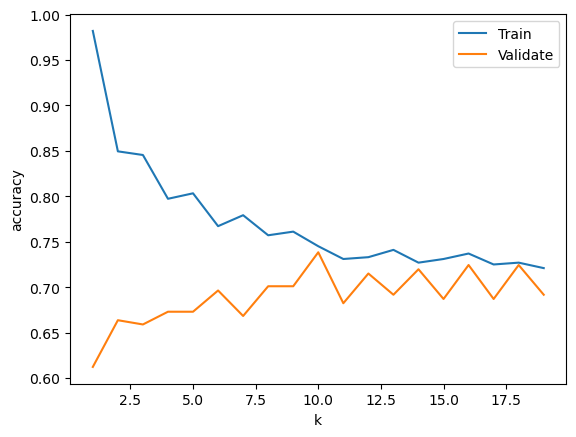

In [10]:
# finding the best n_neighbors
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    validate_score.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

Based off the visual, I feel the best n_neighbors is 10.

But since a question later in the exercises asks for 10, we'll do the default of 5 for this one.

In [11]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn1.predict(X_train)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [13]:
y_pred_prob = knn1.predict_proba(X_train)
y_pred_prob[:5]

array([[0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6]])

### Evaluate your results using the model score, confusion matrix, and classification report.

In [44]:
model_1_train = knn1.score(X_train,y_train)
model_1_validate = knn1.score(X_validate,y_validate)
model_1_overfit = model_1_train-model_1_validate
model_1_beat_baseline = model_1_train - baseline_accuracy

print(f'Accuracy Scores:\n\
\nBaseline Accuracy:\n{baseline_accuracy:2%}\
\n\nModel 1 Training Set:\n{model_1_train:2%}\n\nModel 1 Validation Set:\n{model_1_validate:2%}\n\nModel 1 Overfit:\n{model_1_overfit:2%}\n\n\
Model 1 Beat Baseline Accuracy by:\n{model_1_beat_baseline:2%}')

Accuracy Scores:

Baseline Accuracy:
61.616162%

Model 1 Training Set:
80.321285%

Model 1 Validation Set:
67.289720%

Model 1 Overfit:
13.031566%

Model 1 Beat Baseline Accuracy by:
18.705124%


In [15]:
# confusion matrix
labels = sorted(y_train.unique())
neo = confusion_matrix(y_train, y_pred)
neo = pd.DataFrame(neo, 
                   index=[str(label)+ '_actual' for label in labels],
                   columns=[str(label)+ '_predicted' for label in labels]).T
neo

,0_actual,1_actual
0_predicted,261,52
1_predicted,46,139


In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       307
           1       0.75      0.73      0.74       191

    accuracy                           0.80       498
   macro avg       0.79      0.79      0.79       498
weighted avg       0.80      0.80      0.80       498



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
print_and_label(neo)

Accuracy: 
80.321285%

True Positive Rate: 
83.386581%    

False Positive Rate: 
27.225131%

True Negative Rate: 
72.774869%    

False Negative Rate: 
14.983713%

Precision: 
83.386581%    

Recall: 
85.016287%

F1 Score: 
84.193548%    

Support for Did Not Survive: 
307

Support for Did Survive: 
191


### Run through steps 1-3 setting k to 10

In [18]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
y_pred = knn2.predict(X_train)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
y_pred_prob = knn2.predict_proba(X_train)
y_pred_prob[:5]

array([[0.4, 0.6],
       [1. , 0. ],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.6, 0.4]])

In [21]:
model_2_train = knn2.score(X_train,y_train)
model_2_validate = knn2.score(X_validate,y_validate)

In [45]:
model_2_train = knn2.score(X_train,y_train)
model_2_validate = knn2.score(X_validate,y_validate)
model_2_overfit = model_2_train-model_2_validate
model_2_beat_baseline = model_2_train - baseline_accuracy

print(f'Accuracy Scores:\n\
\nBaseline Accuracy:\n{baseline_accuracy:2%}\
\n\nModel 2 Training Set:\n{model_2_train:2%}\n\nModel 2 Validation Set:\n{model_2_validate:2%}\n\nModel 2 Overfit:\n{model_2_overfit:2%}\n\n\
Model 2 Beat Baseline Accuracy by:\n{model_2_beat_baseline:2%}')

Accuracy Scores:

Baseline Accuracy:
61.616162%

Model 2 Training Set:
74.497992%

Model 2 Validation Set:
73.831776%

Model 2 Overfit:
0.666216%

Model 2 Beat Baseline Accuracy by:
12.881830%


In [23]:
# confusion matrix
labels = sorted(y_train.unique())
neo2 = confusion_matrix(y_train, y_pred)
neo2 = pd.DataFrame(neo2, 
                   index=[str(label)+ '_actual' for label in labels],
                   columns=[str(label)+ '_predicted' for label in labels]).T
neo2

,0_actual,1_actual
0_predicted,268,88
1_predicted,39,103


In [24]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       307
           1       0.73      0.54      0.62       191

    accuracy                           0.74       498
   macro avg       0.74      0.71      0.71       498
weighted avg       0.74      0.74      0.74       498



In [25]:
print_and_label(neo2)

Accuracy: 
80.321285%

True Positive Rate: 
83.386581%    

False Positive Rate: 
27.225131%

True Negative Rate: 
72.774869%    

False Negative Rate: 
14.983713%

Precision: 
83.386581%    

Recall: 
85.016287%

F1 Score: 
84.193548%    

Support for Did Not Survive: 
307

Support for Did Survive: 
191


### Run through steps 1-3 setting k to 20

In [26]:
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [27]:
y_pred = knn3.predict(X_train)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
y_pred_prob = knn3.predict_proba(X_train)
y_pred_prob[:5]

array([[0.45, 0.55],
       [0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.7 , 0.3 ],
       [0.65, 0.35]])

In [29]:
model_3_train = knn3.score(X_train,y_train)
model_3_validate = knn3.score(X_validate,y_validate)

In [56]:
model_3_train = knn3.score(X_train,y_train)
model_3_validate = knn3.score(X_validate,y_validate)
model_3_overfit = model_3_train-model_3_validate
model_3_beat_baseline = model_3_train - baseline_accuracy

print(f'Accuracy Scores:\n\
\nBaseline Accuracy:\n{baseline_accuracy:2%}\
\n\nModel 3 Training Set:\n{model_3_train:2%}\n\nModel 3 Validation Set:\n{model_3_validate:2%}\n\nModel 3 Overfit:\n{model_3_overfit:2%}\nThe validate set actually did better then training set here\n\n\
Model 3 Beat Baseline Accuracy by:\n{model_3_beat_baseline:2%}')

Accuracy Scores:

Baseline Accuracy:
61.616162%

Model 3 Training Set:
71.084337%

Model 3 Validation Set:
71.495327%

Model 3 Overfit:
-0.410990%
The validate set actually did better then training set here

Model 3 Beat Baseline Accuracy by:
9.468176%


In [31]:
# confusion matrix
labels = sorted(y_train.unique())
neo3 = confusion_matrix(y_train, y_pred)
neo3 = pd.DataFrame(neo3, 
                   index=[str(label)+ '_actual' for label in labels],
                   columns=[str(label)+ '_predicted' for label in labels]).T
neo3

,0_actual,1_actual
0_predicted,271,108
1_predicted,36,83


In [32]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       307
           1       0.70      0.43      0.54       191

    accuracy                           0.71       498
   macro avg       0.71      0.66      0.66       498
weighted avg       0.71      0.71      0.69       498



In [33]:
print_and_label(neo3)

Accuracy: 
80.321285%

True Positive Rate: 
83.386581%    

False Positive Rate: 
27.225131%

True Negative Rate: 
72.774869%    

False Negative Rate: 
14.983713%

Precision: 
83.386581%    

Recall: 
85.016287%

F1 Score: 
84.193548%    

Support for Did Not Survive: 
307

Support for Did Survive: 
191


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### Answer: Model 1 performs the best on our in-sample data, but it had the largest amount of overfitting. Once we increase the amount of neighbors the models are looking for, our overfitting drops drastically.

In [55]:
print(f'Baseline Accuracy:\n{baseline_accuracy:2%}\
\n\nAccuracy Scores:\
\n\nModel 1 Training Set:\n{model_1_train:2%}\n\nModel 1 Validation Set:\n{model_1_validate:2%}\n\nModel 1 Overfit:\n{model_1_overfit:2%}\n\n\
Model 1 Beat Baseline Accuracy by:\n{model_1_beat_baseline:2%}\
\n\nModel 2 Training Set:\n{model_2_train:2%}\n\nModel 2 Validation Set:\n{model_2_validate:2%}\n\nModel 2 Overfit:\n{model_2_overfit:2%}\n\n\
Model 2 Beat Baseline Accuracy by:\n{model_2_beat_baseline:2%}\
\n\nModel 3 Training Set:\n{model_3_train:2%}\n\nModel 3 Validation Set:\n{model_3_validate:2%}\n\nModel 3 Overfit:\n{model_3_overfit:2%}\
\nThe validate set actually did better then the training set here\
\n\n\Model 3 Beat Baseline Accuracy by:\n{model_3_beat_baseline:2%}')

Baseline Accuracy:
61.616162%

Accuracy Scores:

Model 1 Training Set:
80.321285%

Model 1 Validation Set:
67.289720%

Model 1 Overfit:
13.031566%

Model 1 Beat Baseline Accuracy by:
18.705124%

Model 2 Training Set:
74.497992%

Model 2 Validation Set:
73.831776%

Model 2 Overfit:
0.666216%

Model 2 Beat Baseline Accuracy by:
12.881830%

Model 3 Training Set:
71.084337%

Model 3 Validation Set:
71.495327%

Model 3 Overfit:
-0.410990%
The validate set actually did better then the training set here

\Model 3 Beat Baseline Accuracy by:
9.468176%


### Which model performs best on our out-of-sample data from validate?

#### Answer: Just looking at out out-of-sample data, Model 2 does the best at almost 74%, only seeing about a 1% drop off from the in-sample data. This is our best model.